In [1]:
import cv2
from matplotlib import pyplot as plt
import os
import numpy as np
import random

In [2]:
def randomized_img(path, num_images=10):
    files = [i for i in os.listdir(path) if i.lower().endswith(('png', 'jpg', 'jpeg'))]
    selected = random.sample(files, min(num_images, len(files)))
    return [os.path.join(path, file) for file in selected]

def display_images_grid(image_paths, grid_size=(2, 5)):
    fig, axes = plt.subplots(grid_size[0], grid_size[1], figsize=(12, 6))
    axes = axes.flatten()
    
    for ax, img_path in zip(axes, image_paths):
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
        ax.imshow(img)
        ax.set_title(os.path.basename(img_path))
        ax.axis('off')
    
    for ax in axes[len(image_paths):]:
        ax.axis('off')
    
    plt.tight_layout()
    plt.show()

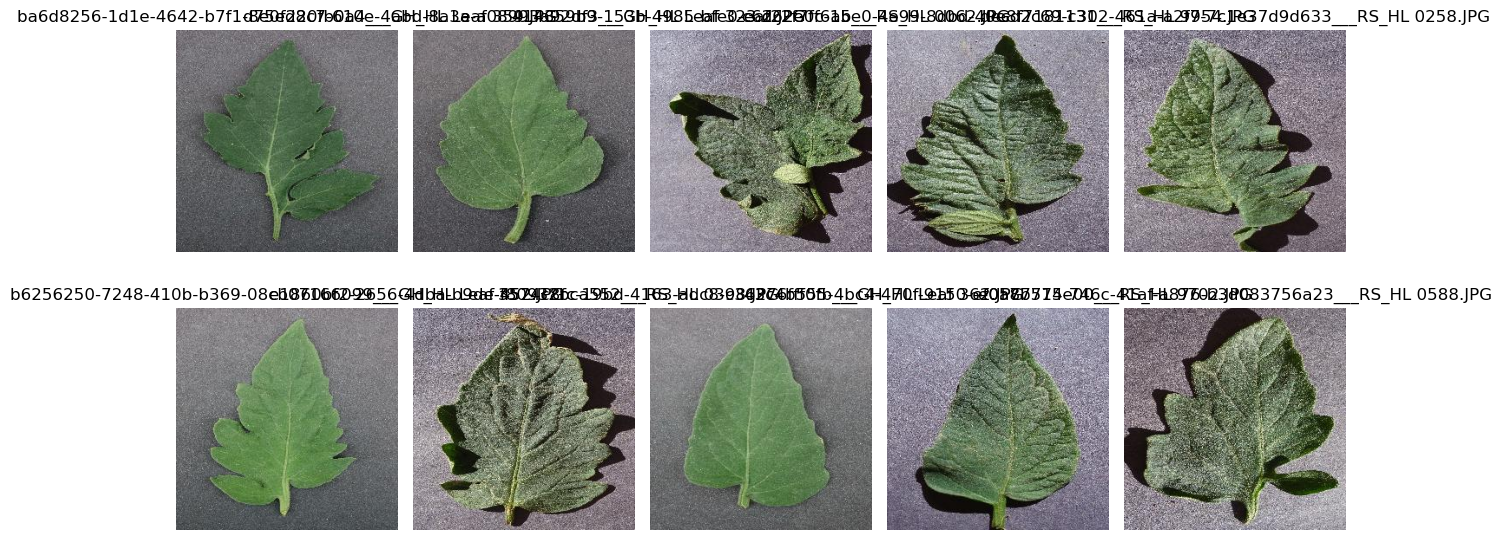

In [3]:
folder_path = "raw/color/Tomato___healthy"
image_paths = randomized_img(folder_path, num_images=10)
display_images_grid(image_paths)

# Image Segmentation

In [118]:
def display_segmented(image_paths, grid_size=(2, 5)):
    fig, axes = plt.subplots(grid_size[0], grid_size[1], figsize=(12, 6))
    axes = axes.flatten()
    
    for ax, img_path in zip(axes, image_paths):
        image = cv2.imread(img_path) # open the image
        image_rgb = cv2.cvtColor(image,cv2.COLOR_BGR2RGB) # convert to RGB
        image_hsv = cv2.cvtColor(image_rgb,cv2.COLOR_RGB2HSV) # convert to HSV
        mask = cv2.inRange(image_hsv, (10, 30, 0), (110, 255, 255)) # choose the HSV range to make the mask
        # kernel = np.ones((5,5),np.uint8)
        # mask_morph = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
        mask_3ch = cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR) # convert the mask to 3 channels
        foreground = cv2.bitwise_and(image_rgb, mask_3ch) # remove the background
        ax.imshow(foreground) # show the images with removed background
        ax.set_title(os.path.basename(img_path))
        ax.axis('off')
    
    for ax in axes[len(image_paths):]:
        ax.axis('off')
    
    plt.tight_layout()
    plt.show()

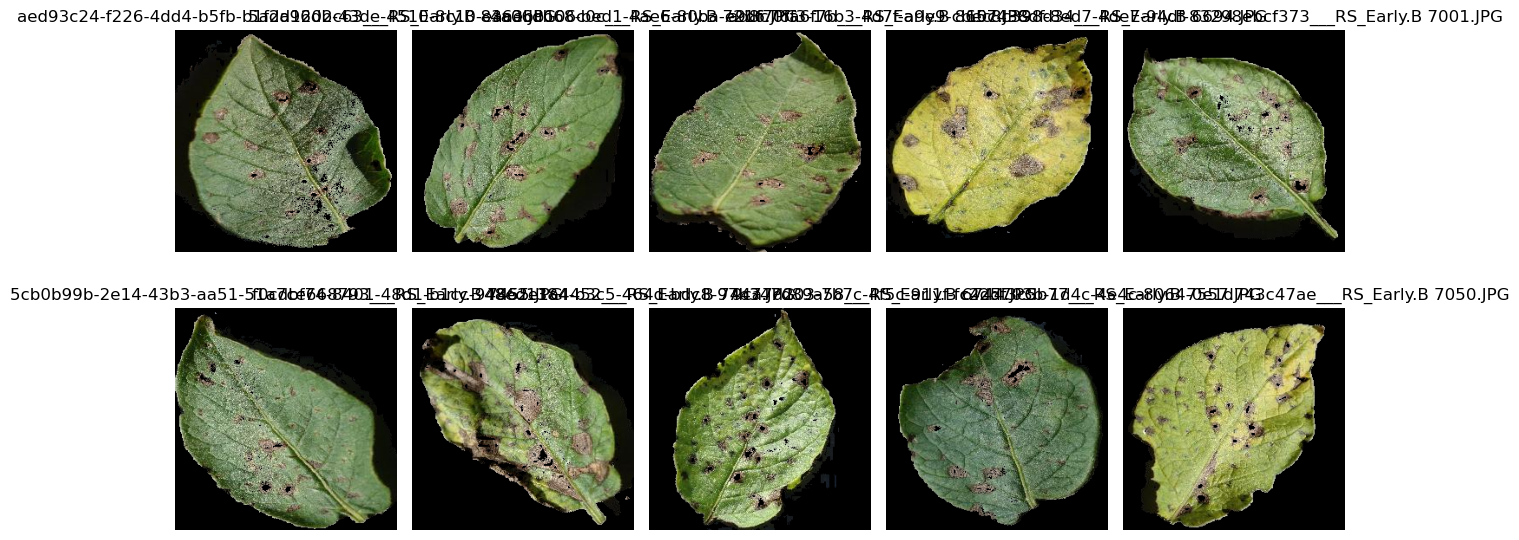

In [122]:
# Display 
folder_path = "raw/color/Potato___Early_blight"
image_paths = randomized_img(folder_path, num_images=10)
display_segmented(image_paths)

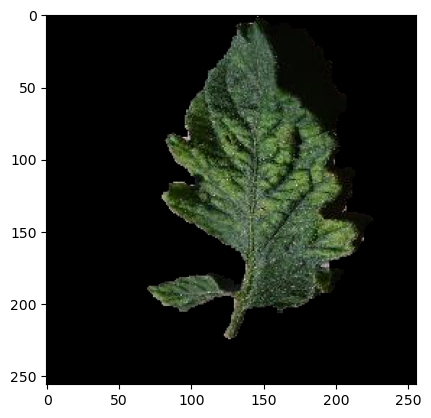

In [102]:
image = cv2.imread("raw/color/Tomato___Tomato_mosaic_virus/046a2559-23b4-4018-a3db-337347ceb391___PSU_CG 2321.JPG")
image_rgb = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
image_hsv = cv2.cvtColor(image_rgb,cv2.COLOR_RGB2HSV)
mask = cv2.inRange(image_hsv, (10, 30, 0), (110, 255, 255))
# kernel = np.ones((5,5),np.uint8)
# mask_morph = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
mask_3ch = cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR)
foreground = cv2.bitwise_and(image_rgb, mask_3ch)
plt.imshow(foreground, vmin=0, vmax=255)

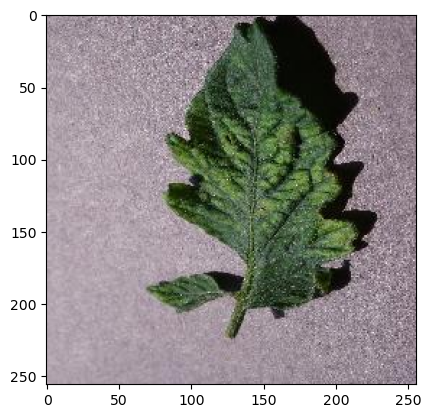

In [100]:
plt.imshow(image_rgb, vmin=0, vmax=255)